# Concept Prediction Profiles

Our task is to generate graphs which illustrate trends across predicted concepts for our six models' predictions. This will require a lot of joining.

In [29]:
from os import listdir
from os.path import isfile, join
base_path = "opus_base/best_results"
big_path = "opus_big/best_results"
base_files = [join(base_path, f) for f in listdir(base_path) if isfile(join(base_path, f))] 
big_files = [join(big_path, f) for f in listdir(big_path) if isfile(join(big_path, f))]
base_files = [base_files[0], base_files[2], base_files[3], base_files[5], base_files[1], base_files[4]]
big_files = [big_files[0], big_files[2], big_files[3], big_files[4], big_files[1], big_files[5]]

In [30]:
#Find sentence with highest number of true positives
import pandas as pd
base_names = []
base_tp = []
base_fp = []
base_fn = []
for filename in base_files:
    name = filename.replace("opus_base/best_results\\", "").replace("_onto_output.txt", "")
    df = pd.read_csv(filename, sep = "\t")
    df = df.drop(columns = ["sent_ID", "count_preds", "count_refs", "remark"])
    grouped_concepts = df.groupby(["concept"]).sum() #This becomes the index
    base_names.append(name)
    base_tp.append(grouped_concepts[["true_positives"]])
    base_fp.append(grouped_concepts[["false_positives"]])
    base_fn.append(grouped_concepts[["false_negatives"]])

In [43]:
first_base_tp = base_tp[0].rename(columns={"true_positives" : "tp_" + base_names[0]})
for (idx, df) in enumerate(base_tp[1:]):
    first_base_tp["tp_" + base_names[idx + 1]] = df["true_positives"]
first_base_tp = first_base_tp.fillna(0)

In [49]:
first_base_tp

,tp_opus-mt-en-fr,tp_opus_wmt_finetuned_enfr_hpc,tp_opus_wmt_finetuned_enfr_wang_2022,tp_opus_wmt_finetuned_enfr_wu_2022,tp_opus_wmt_finetuned_enfr_choi_2022,tp_opus_wmt_finetuned_enfr_wce
concept,,,,,,
ACTH,4,2.0,2.0,2.0,2.0,2.0
ARN,0,0.0,0.0,0.0,0.0,0.0
Accident vasculaire cérébral,0,0.0,0.0,0.0,0.0,0.0
Accomplissement,0,0.0,0.0,0.0,0.0,0.0
Actualités,1,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
équilibre,7,2.0,1.0,1.0,1.0,2.0
équin,0,0.0,0.0,1.0,0.0,1.0
érythropoïétine,2,0.0,0.0,0.0,0.0,0.0


<Axes: >

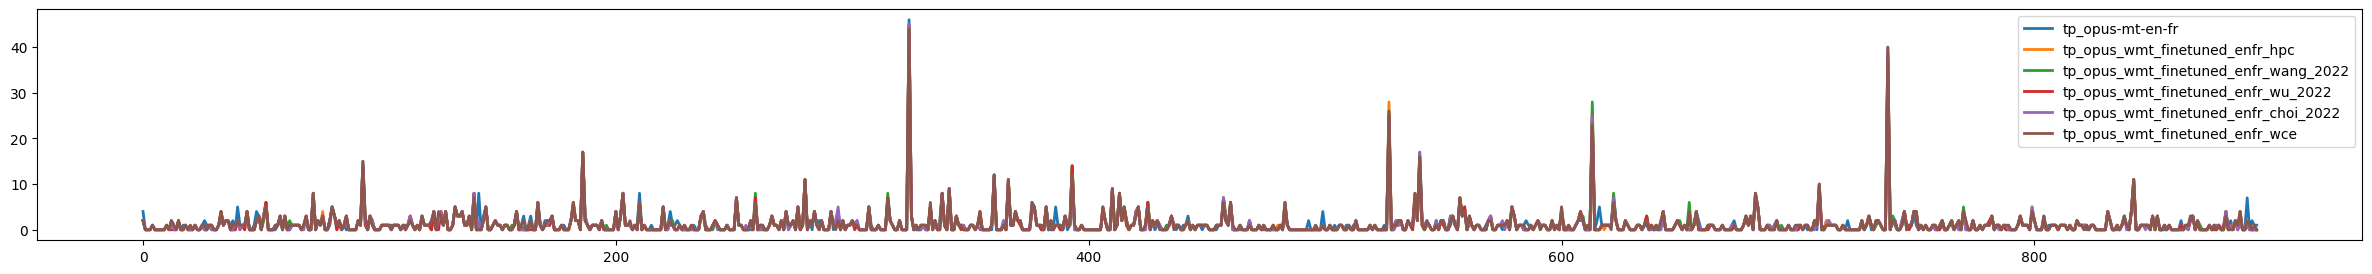

In [111]:
first_base_tp.reset_index().plot(lw=2, figsize=(30, 3))
#y = ["tp_opus-mt-en-fr", "tp_opus_wmt_finetuned_enfr_wce"]
#Although this sounded like a wonderful idea in my head, there are so many concepts with such slight differences that it would be pointless to generate such a graph. 
#The very small differences in our summary statistics convey the same message anyway.